In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('default')

In [2]:
df = pd.read_csv('./resources/60min_x1_summary.csv', header=[0], index_col=[0])
df

,noRET_RET,noRET_EM,noRET_SRT,10min_RET,10min_EM,10min_SRT,1h_RET,1h_EM,1h_SRT,6h_RET,6h_EM,6h_SRT
animal,,,,,,,,,,,,
#1,53.333333,27.483333,NaN,70.266667,51.400000,NaN,18.900000,3.050000,16.950000,28.050000,2.766667,31.666667
#2,26.366667,17.216667,NaN,28.350000,0.000000,NaN,30.283333,14.716667,49.166667,42.800000,28.333333,51.666667
#3,70.266667,38.883333,NaN,26.933333,10.000000,NaN,44.150000,6.666667,37.216667,62.216667,19.983333,43.883333
#4,42.783333,35.000000,NaN,72.483333,40.833333,NaN,69.983333,51.950000,68.900000,18.066667,4.983333,5.000000
#5,38.616667,16.383333,NaN,63.633333,67.216667,NaN,67.500000,16.116667,15.833333,48.066667,5.000000,26.400000
#6,39.183333,16.383333,NaN,46.950000,18.883333,NaN,38.600000,7.783333,16.950000,37.216667,10.566667,14.716667
#7,55.566667,36.133333,NaN,35.833333,27.500000,NaN,36.933333,13.600000,27.516667,64.166667,19.733333,53.633333
#8,46.650000,35.566667,NaN,35.283333,36.666667,NaN,67.783333,26.100000,42.783333,32.766667,20.000000,23.616667


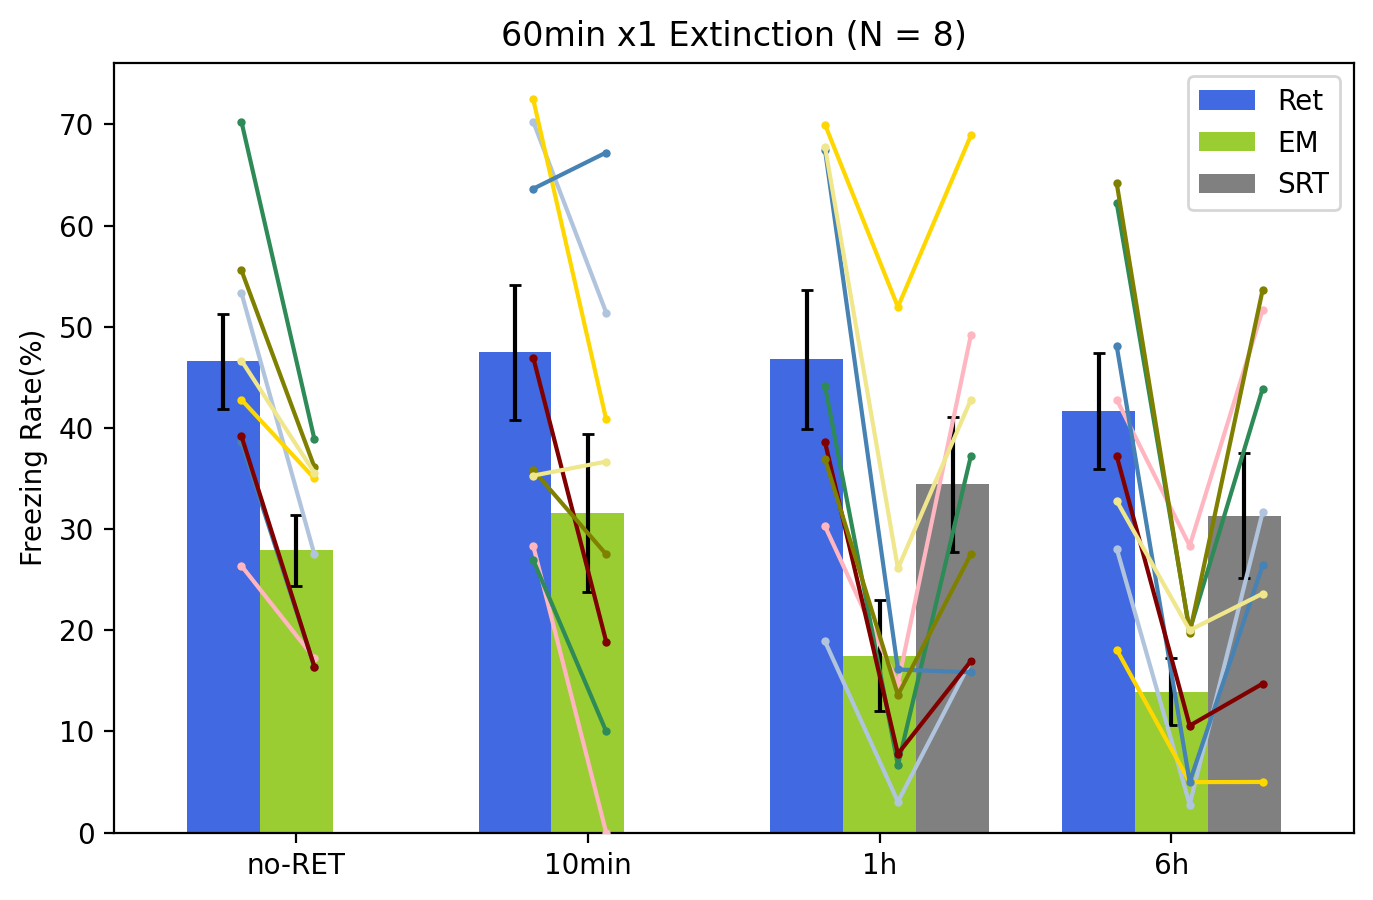

In [3]:
labels = np.array(['no-RET', '10min', '1h', '6h'])

ret = df.iloc[:, [0, 3, 6, 9]]
em  = df.iloc[:, [1, 4, 7, 10]]
srt = df.iloc[:, [2, 5, 8, 11]]

ret_mean, ret_sem = ret.mean(), ret.sem()
em_mean, em_sem   = em.mean(), em.sem()
srt_mean, srt_sem = srt.mean(), srt.sem()
demo_srt_mean = em_mean + np.random.randint(-3.0, 3.0, len(srt_mean))  # data for srt sample

left = np.arange(0.0, 4.9, 1.6)
width = 0.40

fig, ax = plt.subplots(figsize=(8, 5), dpi=200)

ax.bar(x=left - width, height=ret_mean, yerr=ret_sem, capsize=2, width=width, label='Ret', align='center', color='royalblue')
ax.bar(x=left, height=em_mean, yerr=em_sem, capsize=2, width=width, label='EM', align='center', color='yellowgreen')
ax.bar(x=left + width, height=srt_mean, yerr=srt_sem, capsize=2, width=width, label='SRT', align='center', color='gray')
# ax.bar(x=left + width, height=demo_srt_mean, yerr=srt_sem, capsize=2, width=width, label='SRT?', align='center', fill=False, ls='--', ec='gray', lw='2') # view sample
ax.set_xticks([0.0, 1.6, 3.2, 4.8])
ax.set_xticklabels(labels=labels)

x_no = list(np.arange(-0.3, 0.6, 0.4))
x_10min = list(np.arange(1.3, 2.2, 0.4))
x_1h = list(np.arange(2.9, 3.8, 0.4))
x_6h = list(np.arange(4.5, 5.4, 0.4))

colors = [
    'lightsteelblue',
    'lightpink',
    'seagreen',
    'gold',
    'steelblue',
    'maroon',
    'olive',
    'khaki'
]
for animal_number in range(8):
    plt.plot(x_no, df.iloc[animal_number, 0:3], zorder=12, marker='o', markersize=2, c=colors[animal_number])
    plt.plot(x_10min, df.iloc[animal_number, 3:6], zorder=12, marker='o', markersize=2, c=colors[animal_number])
    plt.plot(x_1h, df.iloc[animal_number, 6:9], zorder=12, marker='o', markersize=2, c=colors[animal_number])
    plt.plot(x_6h, df.iloc[animal_number, 9:12], zorder=12, marker='o', markersize=2, c=colors[animal_number])

ax.set_xlim(-1.0, 5.8)
ax.set_ylabel('Freezing Rate(%)')
ax.set_title('60min x1 Extinction (N = 8)')
ax.legend()
fig.show()

In [4]:
diff_df = pd.DataFrame(columns=['no-RET', '10min', '1h', '6h'], index=df.index)
diff_df

,no-RET,10min,1h,6h
animal,,,,
#1,NaN,NaN,NaN,NaN
#2,NaN,NaN,NaN,NaN
#3,NaN,NaN,NaN,NaN
#4,NaN,NaN,NaN,NaN
#5,NaN,NaN,NaN,NaN
#6,NaN,NaN,NaN,NaN
#7,NaN,NaN,NaN,NaN
#8,NaN,NaN,NaN,NaN


In [5]:
for animal_number, row in df.iterrows():
    diff_no = row['noRET_RET'] - row['noRET_EM']
    diff_10min = row['10min_RET'] - row['10min_EM']
    diff_1h = row['1h_RET'] - row['1h_EM']
    diff_6h = row['6h_RET'] - row['6h_EM']

    diff_df.loc[animal_number, :] = [diff_no, diff_10min, diff_1h, diff_6h]

diff_df

,no-RET,10min,1h,6h
animal,,,,
#1,25.85,18.866667,15.85,25.283333
#2,9.15,28.35,15.566667,14.466667
#3,31.383333,16.933333,37.483333,42.233333
#4,7.783333,31.65,18.033333,13.083333
#5,22.233333,-3.583333,51.383333,43.066667
#6,22.8,28.066667,30.816667,26.65
#7,19.433333,8.333333,23.333333,44.433333
#8,11.083333,-1.383333,41.683333,12.766667


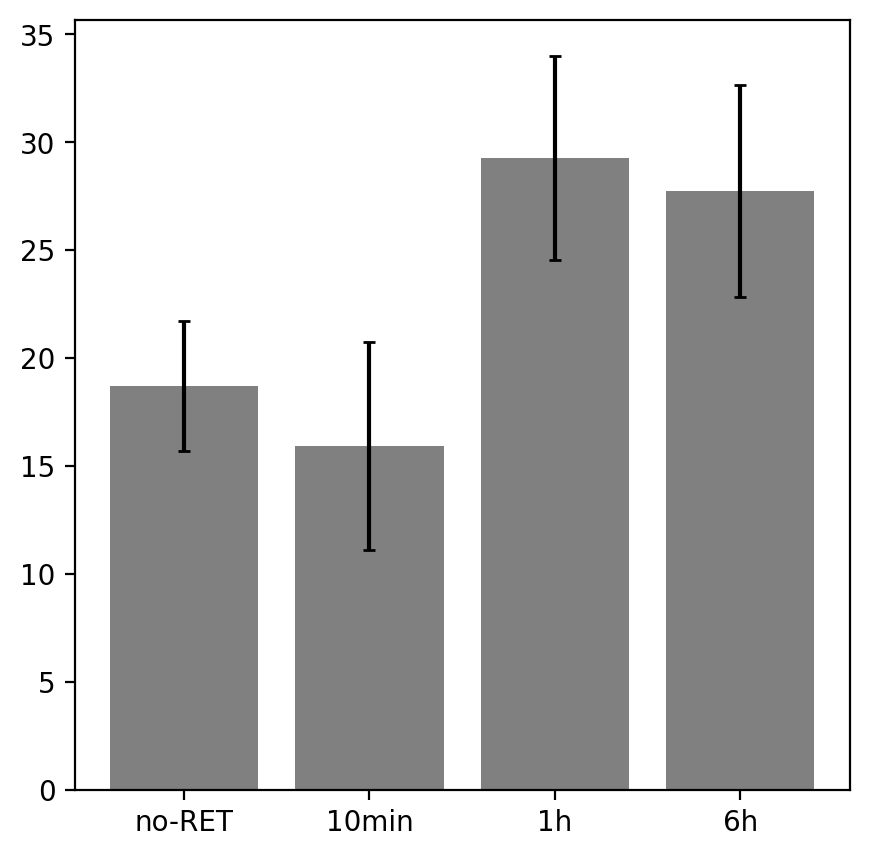

In [6]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=200)

for index, (interval, items) in enumerate(diff_df.iteritems()):
    mean, sem = items.mean(), items.sem()

    ax.bar(x=index, height=mean, yerr=sem, capsize=2, label=interval, align='center', color='gray')

ax.set_xticks(list(range(4)))
ax.set_xticklabels(labels=diff_df.columns)
plt.show()

In [7]:
import seaborn as sns

In [8]:
seaborn_df = pd.DataFrame(columns=['animal', 'interval', 'freezing'])
seaborn_df

,animal,interval,freezing


In [9]:
animals = []
intervals = []
freezings = []

for interval, items in diff_df.iteritems():
    animals.extend(diff_df.index.to_list())
    intervals.extend([interval] * len(items))
    freezings.extend(items.to_list())

seaborn_df['animal'] = animals
seaborn_df['interval'] = intervals
seaborn_df['freezing'] = freezings

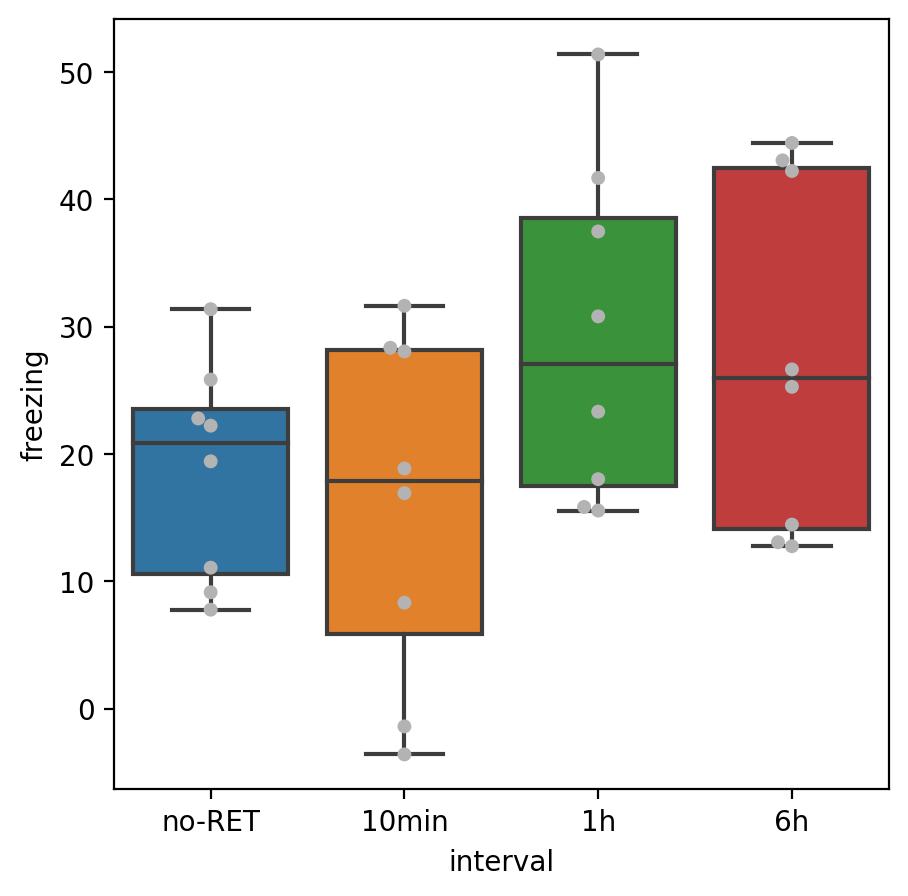

In [10]:
fig, ax = plt.subplots(figsize=(5,5), dpi=200)

sns.boxplot(x=seaborn_df['interval'], y=seaborn_df['freezing'], ax=ax)
sns.swarmplot(x=seaborn_df['interval'], y=seaborn_df['freezing'], ax=ax, color='0.7')

plt.show()

In [11]:
ext_no_df = pd.read_csv('./resources/extinction/60min_x1_noRET_extinction_result.csv', header=[0], index_col=[0])
ext_no_df

,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9,bin10,bin11,bin12,bin13,bin14,bin15,bin16,bin17,bin18,bin19,bin20
animal,,,,,,,,,,,,,,,,,,,,
#1,53.333333,30.550000,20.283333,23.316667,33.883333,20.266667,16.116667,18.333333,18.600000,27.800000,14.733333,22.783333,27.216667,16.383333,13.900000,14.450000,16.683333,14.450000,15.283333,26.933333
#2,26.366667,30.283333,41.933333,32.783333,31.400000,31.383333,15.000000,40.000000,36.383333,38.050000,31.933333,28.900000,44.983333,48.600000,31.100000,26.683333,36.950000,16.133333,7.500000,21.950000
#3,70.266667,74.166667,16.400000,32.233333,25.266667,25.266667,23.033333,13.616667,23.333333,23.350000,19.183333,40.000000,54.733333,37.500000,28.900000,50.000000,54.433333,30.816667,62.516667,60.566667
#4,42.783333,42.483333,36.116667,39.183333,27.500000,33.616667,45.283333,31.400000,37.783333,42.783333,47.216667,27.766667,33.616667,55.833333,31.950000,31.933333,37.516667,66.650000,55.550000,48.333333
#5,38.616667,34.716667,29.166667,44.716667,19.450000,29.450000,36.666667,38.633333,48.616667,26.666667,29.150000,58.033333,24.733333,28.883333,50.266667,32.500000,20.000000,45.016667,36.400000,40.833333
#6,39.183333,31.116667,38.900000,25.550000,28.050000,32.216667,26.950000,16.666667,14.433333,17.500000,19.166667,17.216667,7.500000,16.933333,20.550000,20.550000,23.316667,38.900000,30.000000,32.216667
#7,18.883333,29.450000,30.833333,30.016667,19.733333,18.316667,19.166667,13.050000,38.600000,43.883333,30.566667,41.683333,38.900000,59.433333,18.066667,43.050000,44.450000,64.183333,57.216667,56.950000
#8,55.566667,53.616667,35.833333,34.716667,40.000000,30.266667,21.650000,13.333333,30.833333,22.216667,12.233333,46.666667,25.250000,31.933333,30.000000,30.566667,20.000000,12.783333,27.500000,46.666667
#9,46.650000,27.500000,27.250000,17.233333,26.116667,22.516667,35.000000,29.450000,58.333333,28.033333,21.933333,68.900000,49.166667,67.483333,37.216667,7.500000,18.316667,16.950000,66.916667,17.500000


In [12]:
ext_10min_df = pd.read_csv('./resources/extinction/60min_x1_10min_extinction_result.csv', header=[0], index_col=[0])
ext_10min_df

,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9,bin10,bin11,bin12,bin13,bin14,bin15,bin16,bin17,bin18,bin19,bin20
animal,,,,,,,,,,,,,,,,,,,,
#1,33.066667,45.300000,66.666667,54.166667,30.850000,35.550000,58.066667,45.816667,61.133333,34.733333,28.616667,40.566667,53.050000,50.000000,73.616667,44.716667,31.950000,70.850000,37.500000,41.933333
#2,13.066667,18.333333,16.650000,23.066667,16.950000,25.833333,18.333333,1.116667,12.516667,8.600000,9.450000,27.483333,16.400000,10.266667,33.883333,11.950000,9.716667,9.166667,31.116667,10.833333
#3,19.150000,19.433333,12.800000,15.833333,26.100000,12.500000,7.233333,8.066667,16.133333,15.583333,8.066667,15.550000,14.166667,5.566667,10.283333,14.450000,2.500000,5.833333,14.166667,18.066667
#4,45.000000,48.900000,41.950000,38.900000,55.550000,46.950000,50.000000,44.166667,32.783333,34.183333,55.266667,23.050000,29.166667,20.266667,48.033333,40.566667,55.550000,31.383333,65.266667,68.616667
#5,64.183333,56.650000,52.233333,42.216667,32.500000,47.483333,50.566667,44.433333,53.583333,57.766667,45.266667,49.150000,42.233333,58.616667,49.716667,59.733333,33.316667,58.866667,56.933333,74.450000
#6,39.733333,50.833333,54.716667,28.333333,22.750000,26.116667,18.900000,42.783333,23.900000,29.166667,31.933333,30.266667,38.616667,26.383333,28.333333,32.233333,50.566667,54.150000,40.000000,39.150000
#7,24.183333,35.566667,40.550000,45.566667,42.216667,40.266667,28.900000,20.000000,34.433333,50.283333,43.316667,41.666667,59.450000,53.066667,66.666667,75.816667,50.000000,61.383333,47.233333,47.500000
#8,30.266667,44.166667,28.350000,24.733333,22.783333,13.883333,25.566667,19.733333,40.283333,54.450000,25.550000,71.116667,28.316667,45.833333,58.333333,84.450000,95.550000,45.816667,40.266667,57.500000


In [13]:
ext_1h_df = pd.read_csv('./resources/extinction/60min_x1_1h_extinction_result.csv', header=[0], index_col=[0])
ext_1h_df

,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9,bin10,bin11,bin12,bin13,bin14,bin15,bin16,bin17,bin18,bin19,bin20
animal,,,,,,,,,,,,,,,,,,,,
#1,11.116667,11.966667,6.383333,6.950000,10.016667,3.616667,1.116667,6.383333,11.650000,6.383333,4.450000,0.000000,20.000000,1.116667,11.100000,3.333333,23.600000,5.266667,12.233333,14.166667
#2,45.550000,34.166667,28.600000,14.183333,18.033333,9.433333,26.650000,21.933333,17.783333,11.100000,4.733333,25.000000,44.450000,19.733333,4.716667,42.233333,10.833333,8.350000,0.000000,8.616667
#3,32.216667,23.616667,16.950000,12.233333,13.883333,17.783333,15.266667,3.900000,25.016667,10.283333,24.166667,15.550000,20.566667,22.216667,20.283333,43.050000,13.066667,5.000000,28.600000,6.400000
#4,65.283333,63.616667,59.166667,65.266667,61.933333,56.950000,59.166667,55.000000,56.383333,26.400000,50.283333,50.016667,35.016667,30.000000,55.550000,76.116667,80.833333,54.466667,74.166667,78.333333
#5,36.666667,42.783333,33.066667,35.300000,28.066667,13.916667,21.933333,19.183333,29.433333,35.000000,31.400000,37.766667,23.333333,27.766667,26.950000,45.850000,41.383333,45.816667,31.400000,29.716667
#6,12.516667,16.666667,19.450000,9.733333,4.433333,14.183333,32.483333,10.000000,21.383333,8.350000,41.116667,12.516667,25.000000,24.733333,34.716667,57.233333,23.600000,30.550000,28.600000,19.450000
#7,21.933333,17.783333,28.050000,23.900000,26.383333,24.450000,19.450000,26.100000,25.266667,33.866667,11.383333,16.950000,19.733333,31.666667,23.050000,42.783333,11.950000,35.266667,20.816667,30.000000
#8,62.500000,30.266667,40.266667,34.433333,36.683333,26.400000,40.016667,31.100000,29.983333,31.366667,16.400000,44.983333,23.616667,18.616667,25.283333,23.333333,41.383333,32.783333,56.100000,20.000000


In [14]:
ext_6h_df = pd.read_csv('./resources/extinction/60min_x1_6h_extinction_result.csv', header=[0], index_col=[0])
ext_6h_df

,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9,bin10,bin11,bin12,bin13,bin14,bin15,bin16,bin17,bin18,bin19,bin20
animal,,,,,,,,,,,,,,,,,,,,
#1,22.233333,11.116667,2.783333,13.616667,13.900000,2.766667,11.116667,12.500000,7.216667,26.683333,19.166667,17.216667,26.400000,16.383333,26.100000,36.116667,23.350000,40.000000,37.783333,31.666667
#2,51.116667,59.733333,35.000000,23.600000,28.050000,23.866667,21.666667,26.400000,45.266667,38.633333,30.266667,39.183333,53.900000,40.283333,71.683333,60.000000,69.166667,31.116667,31.950000,61.666667
#3,34.733333,33.883333,27.216667,10.833333,15.283333,15.550000,11.666667,18.616667,11.400000,20.550000,16.933333,13.616667,17.500000,24.166667,18.633333,24.166667,19.450000,9.183333,38.333333,15.550000
#4,11.950000,9.150000,9.150000,7.483333,6.400000,11.116667,5.283333,7.766667,10.000000,7.500000,10.816667,8.883333,11.400000,20.833333,9.150000,12.500000,29.166667,9.166667,13.600000,5.283333
#5,45.850000,24.183333,18.350000,16.383333,24.733333,26.666667,24.983333,8.883333,25.833333,21.383333,33.050000,15.833333,21.666667,36.400000,30.833333,38.616667,62.216667,18.050000,12.500000,24.183333
#6,21.366667,15.566667,31.366667,4.733333,2.766667,6.116667,17.200000,6.950000,2.500000,13.900000,24.166667,33.600000,10.550000,44.716667,55.000000,1.116667,10.833333,18.066667,15.566667,13.616667
#7,53.333333,39.450000,31.116667,30.283333,15.016667,15.283333,19.166667,11.383333,18.350000,6.400000,28.900000,22.233333,3.900000,15.833333,31.383333,17.783333,7.516667,4.166667,18.333333,6.383333
#8,28.900000,23.050000,15.550000,16.666667,23.900000,23.600000,41.950000,43.316667,34.183333,36.400000,35.283333,52.516667,50.266667,38.050000,48.316667,62.216667,72.216667,56.683333,59.700000,31.383333


/tmp/ipykernel_13916/170188619.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=30)


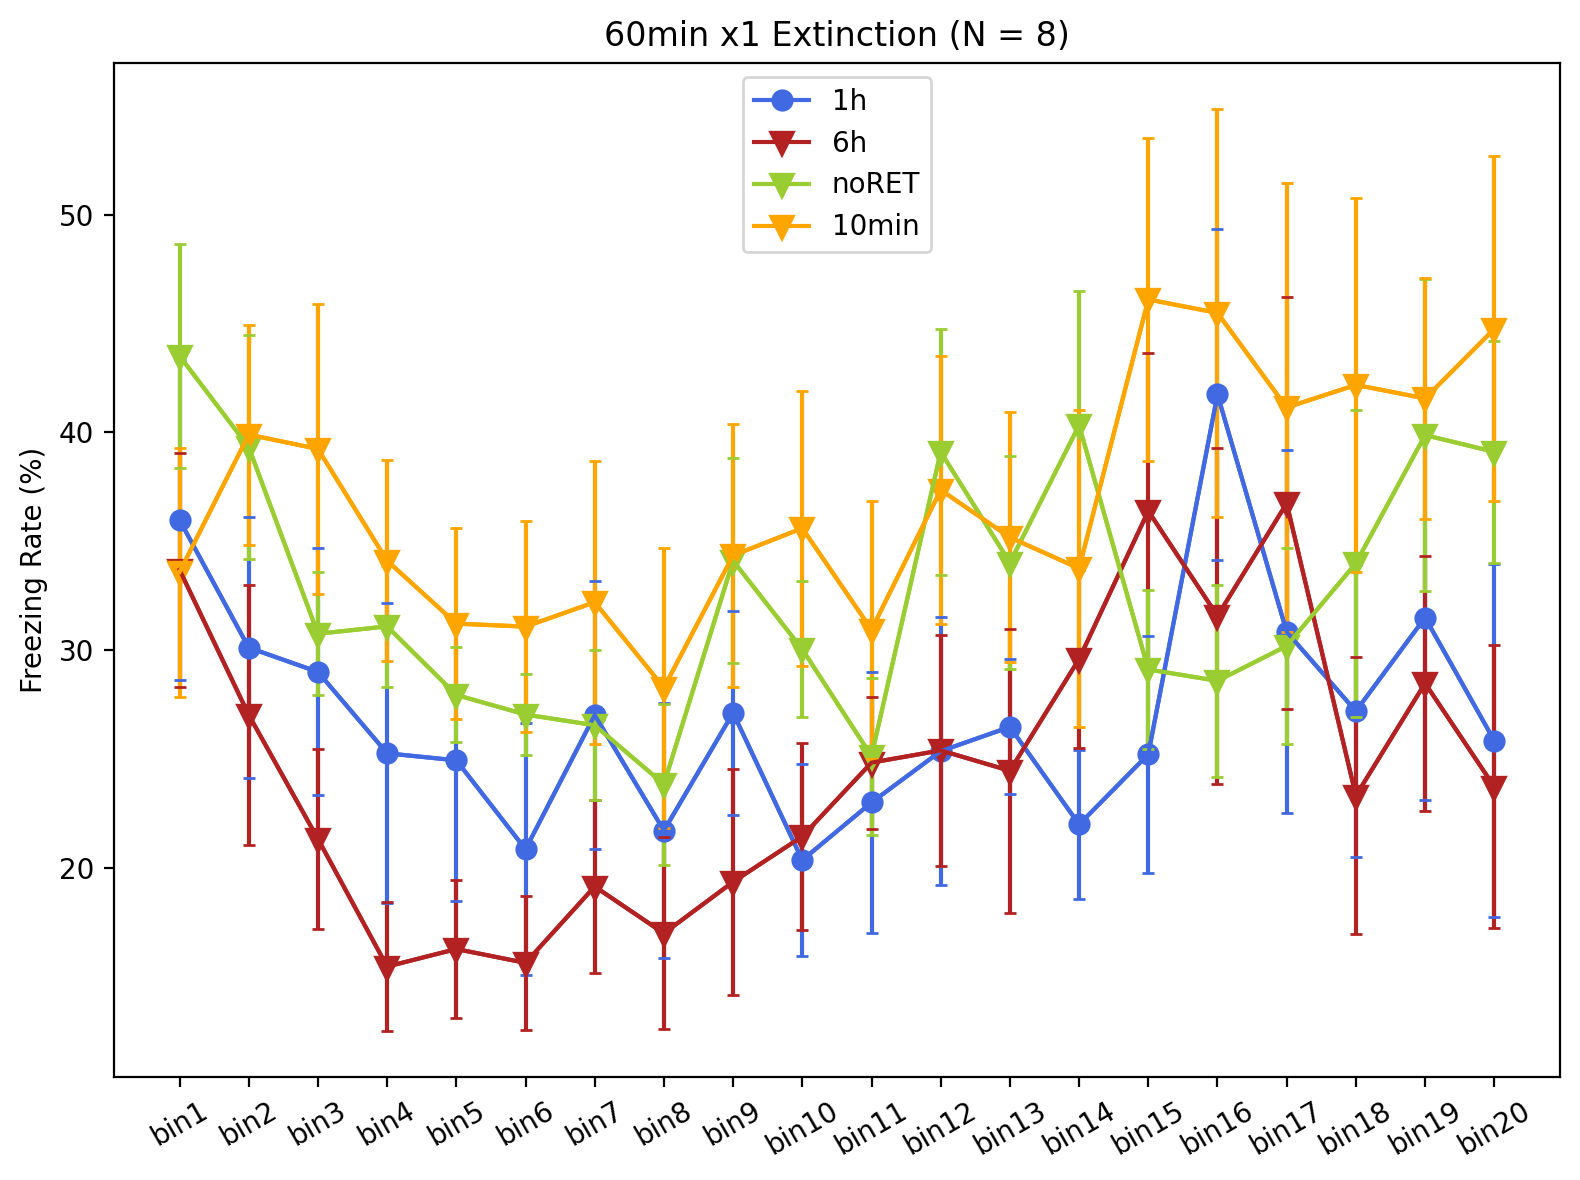

In [15]:
x = ext_1h_df.columns

y_for_1h = ext_1h_df.mean()
error_for_1h = ext_1h_df.sem()

y_for_6h = ext_6h_df.mean()
error_for_6h = ext_6h_df.sem()

y_for_no = ext_no_df.mean()
error_for_no = ext_no_df.sem()

y_for_10min = ext_10min_df.mean()
error_for_10min = ext_10min_df.sem()

fig, ax = plt.subplots(1, figsize=(8, 6), dpi=200, tight_layout=True)

ax.errorbar(x, y_for_1h, yerr=error_for_1h, capsize=2, color='royalblue')
ax.plot(x, y_for_1h, marker="o", markersize=5, markeredgewidth=3, label='1h', color='royalblue')

ax.errorbar(x, y_for_6h, yerr=error_for_6h, capsize=2, color='firebrick')
ax.plot(x, y_for_6h, marker="v", markersize=5, markeredgewidth=3, label='6h', color='firebrick')

ax.errorbar(x, y_for_no, yerr=error_for_no, capsize=2, color='yellowgreen')
ax.plot(x, y_for_no, marker="v", markersize=5, markeredgewidth=3, label='noRET', color='yellowgreen')

ax.errorbar(x, y_for_10min, yerr=error_for_10min, capsize=2, color='orange')
ax.plot(x, y_for_10min, marker="v", markersize=5, markeredgewidth=3, label='10min', color='orange')

ax.set_ylabel('Freezing Rate (%)')
ax.set_xticklabels(x, rotation=30)
ax.set_title('60min x1 Extinction (N = 8)')
ax.legend()

plt.show()

/tmp/ipykernel_13916/3753344227.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1][0].set_xticklabels(x, rotation=75)
/tmp/ipykernel_13916/3753344227.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1][1].set_xticklabels(x, rotation=75)


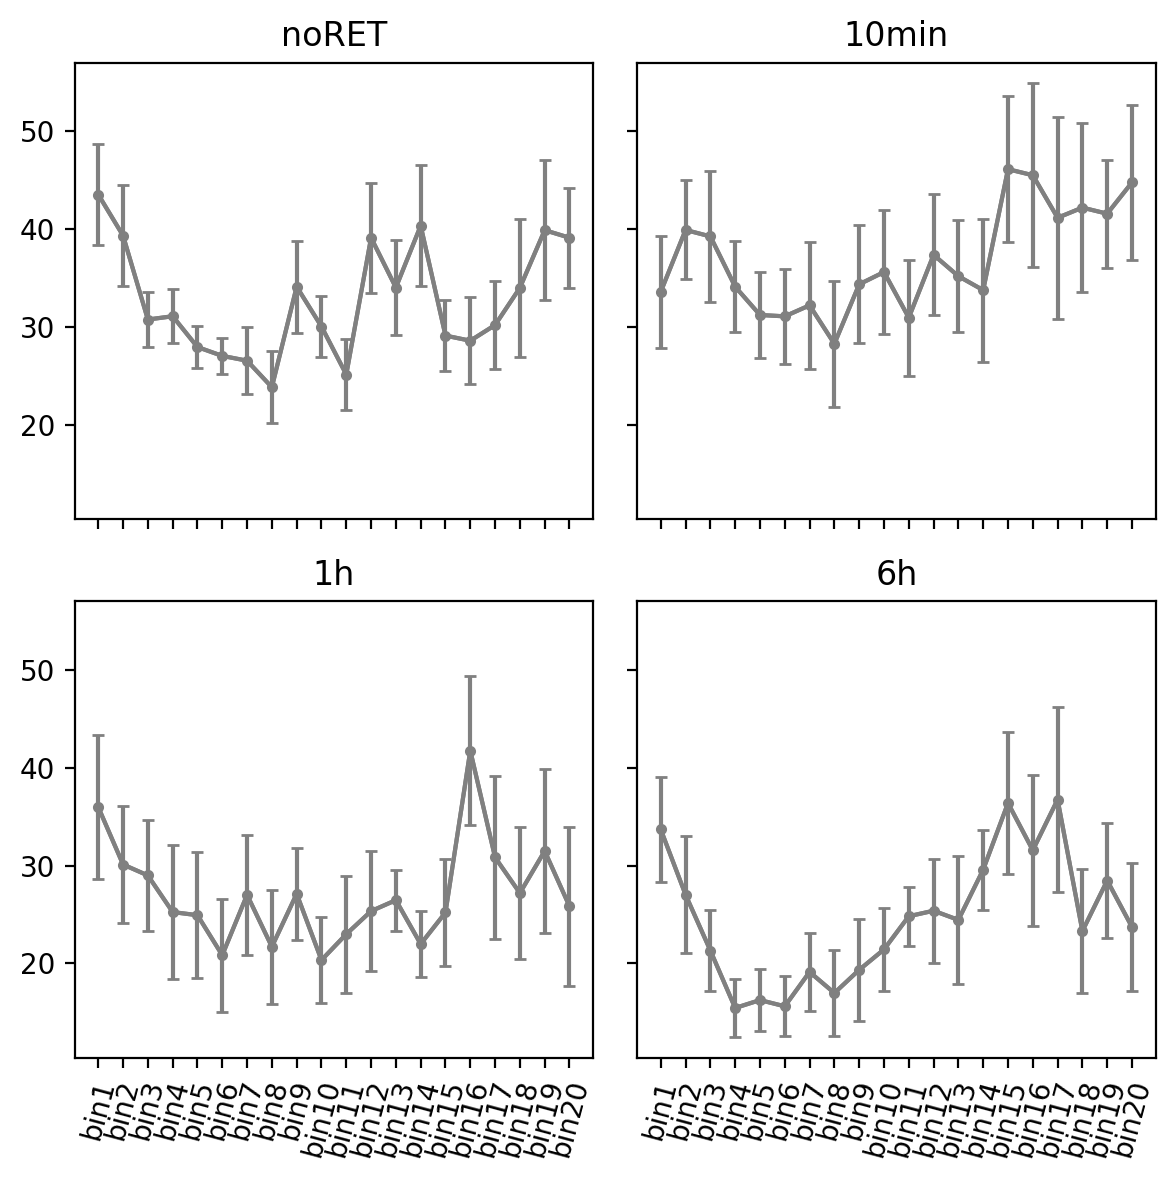

In [16]:
x = ext_1h_df.columns

y_for_1h = ext_1h_df.mean()
error_for_1h = ext_1h_df.sem()

y_for_6h = ext_6h_df.mean()
error_for_6h = ext_6h_df.sem()

y_for_no = ext_no_df.mean()
error_for_no = ext_no_df.sem()

y_for_10min = ext_10min_df.mean()
error_for_10min = ext_10min_df.sem()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 6), dpi=200, tight_layout=True, sharex=True, sharey=True)

axes[1][0].errorbar(x, y_for_1h, yerr=error_for_1h, capsize=2, color='gray')
axes[1][0].plot(x, y_for_1h, marker="o", markersize=3, markeredgewidth=1, label='1h', color='gray')
axes[1][0].set_title('1h')

axes[1][1].errorbar(x, y_for_6h, yerr=error_for_6h, capsize=2, color='gray')
axes[1][1].plot(x, y_for_6h, marker="o", markersize=3, markeredgewidth=1, label='6h', color='gray')
axes[1][1].set_title('6h')

axes[0][0].errorbar(x, y_for_no, yerr=error_for_no, capsize=2, color='gray')
axes[0][0].plot(x, y_for_no, marker="o", markersize=3, markeredgewidth=1, label='noRET', color='gray')
axes[0][0].set_title('noRET')

axes[0][1].errorbar(x, y_for_10min, yerr=error_for_10min, capsize=2, color='gray')
axes[0][1].plot(x, y_for_10min, marker="o", markersize=3, markeredgewidth=1, label='10min', color='gray')
axes[0][1].set_title('10min')

axes[1][0].set_xticklabels(x, rotation=75)
axes[1][1].set_xticklabels(x, rotation=75)

plt.show()